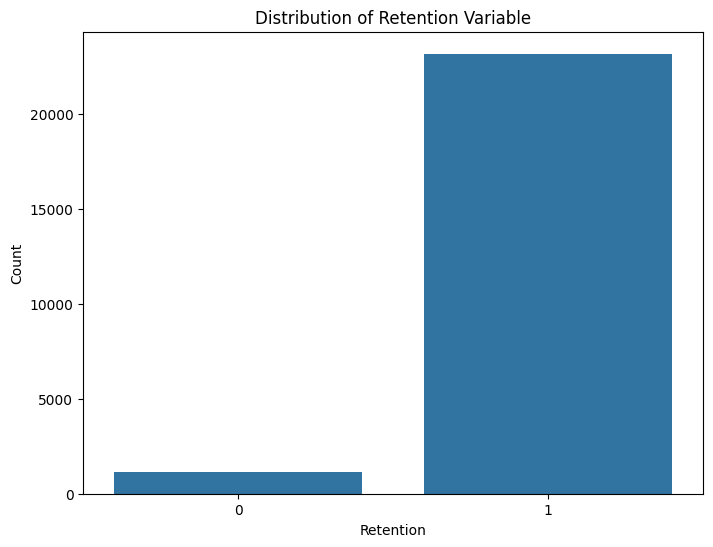

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_path = './data/label_encoded_scaled_data.csv'  # Replace with the correct path
data = pd.read_csv(data_path)

# Count the 0s and 1s in the retention column
target_counts = data['retention'].value_counts()

# Plot the counts
plt.figure(figsize=(8, 6))
sns.countplot(x='retention', data=data)
plt.title('Distribution of Retention Variable')
plt.xlabel('Retention')
plt.ylabel('Count')
plt.show()


In [7]:
# copy and paste rows whit 0 in the data frame to balan
print (data['retention'].value_counts())

retention
1    23163
0     1154
Name: count, dtype: int64


Before balancing:
retention
1    23163
0     1154
Name: count, dtype: int64
After balancing:
retention
0    23163
1    23163
Name: count, dtype: int64


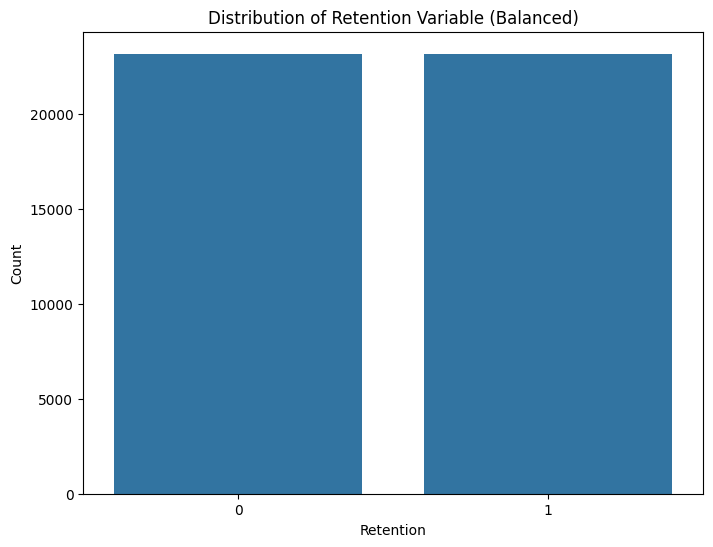

In [8]:
import pandas as pd

# Load the existing data
data_path = './data/label_encoded_scaled_data.csv'  # Replace with the correct path
data = pd.read_csv(data_path)

# Count the 0s and 1s in the retention column
target_counts = data['retention'].value_counts()
print("Before balancing:")
print(target_counts)

# Separate the rows with retention = 0 and retention = 1
data_0 = data[data['retention'] == 0]
data_1 = data[data['retention'] == 1]

# Duplicate the rows with retention = 0
needed_0s = len(data_1) - len(data_0)
data_0_duplicated = data_0.sample(n=needed_0s, replace=True, random_state=42)

# Combine the original data with the duplicated rows
balanced_data = pd.concat([data, data_0_duplicated], axis=0)

# Shuffle the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the counts of the retention values after balancing
target_counts_balanced = balanced_data['retention'].value_counts()
print("After balancing:")
print(target_counts_balanced)

# Save the balanced dataset to a new CSV file
balanced_data.to_csv('./data/balanced_label_encoded_scaled_data.csv', index=False)

# Plot the counts
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='retention', data=balanced_data)
plt.title('Distribution of Retention Variable (Balanced)')
plt.xlabel('Retention')
plt.ylabel('Count')
plt.show()
